<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df_index=pd.read_excel("/content/economic_index.xlsx")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployement_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [48]:
## drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [49]:
df_index.head()

,interest_rate,unemployement_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [50]:
##check null values

df_index.isnull().sum()

interest_rate         0
unemployement_rate    0
index_price           0
dtype: int64

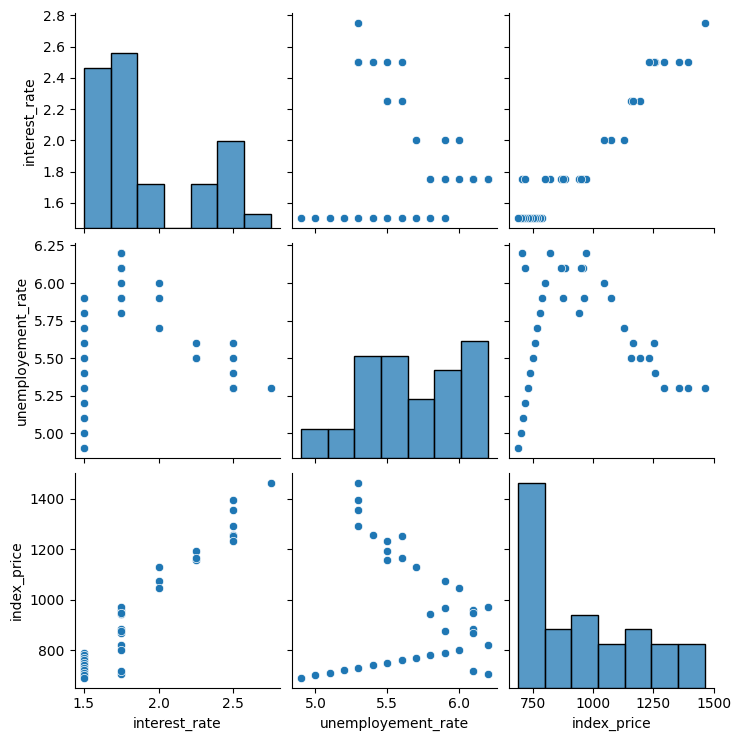

In [51]:
import seaborn as sns
sns.pairplot(df_index)

In [52]:
df_index.corr()

,interest_rate,unemployement_rate,index_price
interest_rate,1.000000,-0.175406,0.960651
unemployement_rate,-0.175406,1.000000,-0.162451
index_price,0.960651,-0.162451,1.000000


Text(0, 0.5, 'Unemployement Rate')

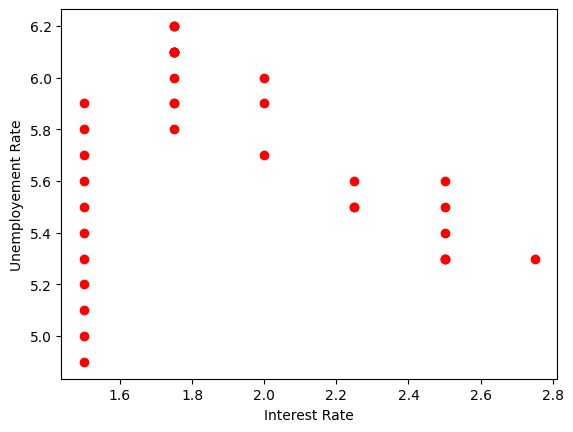

In [53]:
## visualise points
plt.scatter(df_index['interest_rate'],df_index['unemployement_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployement Rate')

In [54]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

X.head()

,interest_rate,unemployement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [55]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
24     800
25     790
26     780
27     770
28     760
29     750
30     740
31     730
32     720
33     710
34     700
35     690
Name: index_price, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

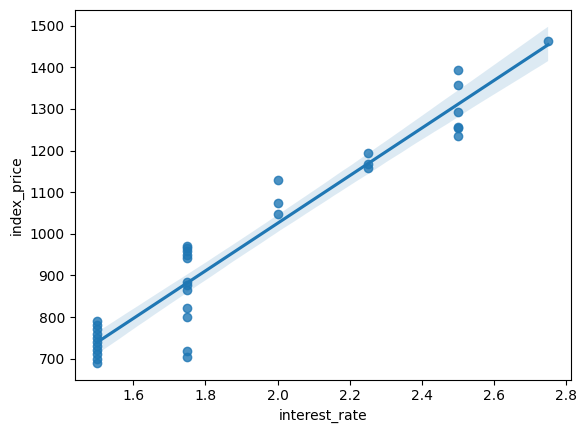

In [57]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployement_rate'>

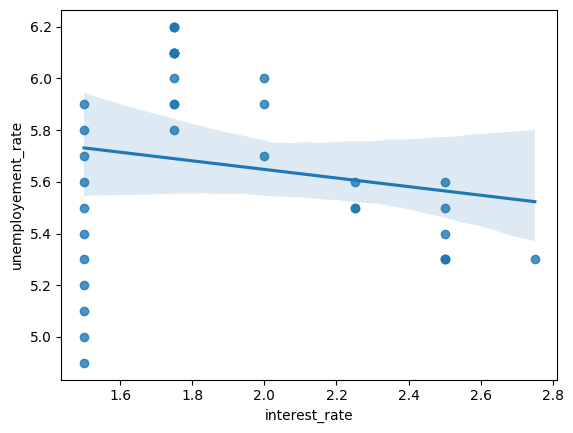

In [58]:
sns.regplot(x='interest_rate', y='unemployement_rate', data=df_index)

<Axes: xlabel='index_price', ylabel='unemployement_rate'>

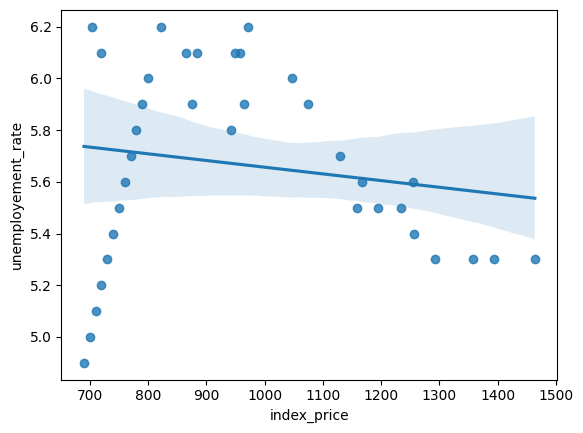

In [59]:
sns.regplot(x='index_price', y='unemployement_rate', data=df_index)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [61]:
X_train

array([[-0.48076197,  1.27920019],
       [ 0.7554831 , -0.1719933 ],
       [-1.09888451, -1.9134255 ],
       [ 1.99172818, -1.0427094 ],
       [ 1.37360564, -0.7524707 ],
       [-1.09888451, -0.462232  ],
       [-0.48076197,  1.27920019],
       [-0.48076197,  1.27920019],
       [ 1.37360564, -0.1719933 ],
       [ 0.13736056,  0.69872279],
       [ 1.37360564, -1.0427094 ],
       [-0.48076197,  0.98896149],
       [ 1.37360564, -1.0427094 ],
       [-1.09888451, -1.6231868 ],
       [ 1.37360564, -1.0427094 ],
       [-1.09888451, -1.3329481 ],
       [-0.48076197,  1.27920019],
       [-1.09888451,  0.1182454 ],
       [ 0.13736056,  0.1182454 ],
       [-0.48076197,  1.56943889],
       [-0.48076197,  1.27920019],
       [-1.09888451,  0.69872279],
       [ 1.37360564, -0.462232  ],
       [-0.48076197,  0.69872279],
       [ 0.7554831 , -0.462232  ],
       [-0.48076197,  0.40848409],
       [-1.09888451, -0.1719933 ]])

In [62]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [63]:
regression.fit(X_train,y_train)

LinearRegression()

In [64]:
##Cross Validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [65]:
np.mean(validation_score)

-5916.414845854569

In [66]:
##Prediction

y_pred=regression.predict(X_test)

In [67]:
y_pred

array([ 754.3501594 ,  873.1809119 ,  733.18642781,  742.59253074,
        866.1263347 ,  744.94405647,  866.1263347 , 1013.17539598,
       1167.27903446])

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Mean Squared Error',mse)
print('Mean Absolute Error',mae)
print('Root Mean Squared Error',rmse)

Mean Squared Error 3239.0566524623464
Mean Absolute Error 45.73589393249329
Root Mean Squared Error 56.91271081632245


In [69]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

print(1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8629915084464872
0.8173220112619829


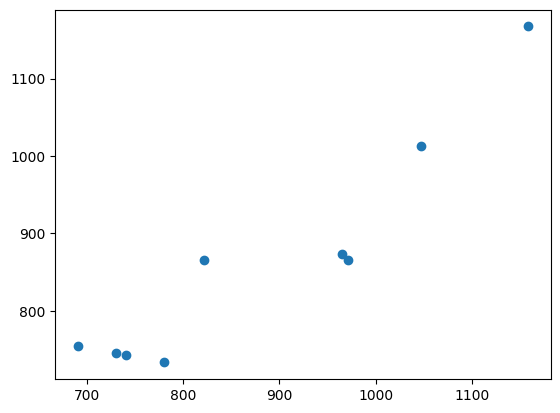

In [70]:
plt.scatter(y_test,y_pred)

In [71]:
residuals=y_test-y_pred
print(residuals)

35    -64.350159
13     91.819088
26     46.813572
30     -2.592531
16    104.873665
31    -14.944056
21    -44.126335
12     33.824604
8      -8.279034
Name: index_price, dtype: float64


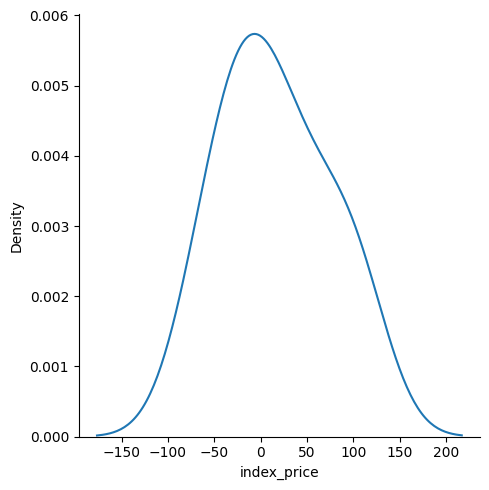

In [72]:
sns.displot(residuals,kind='kde')

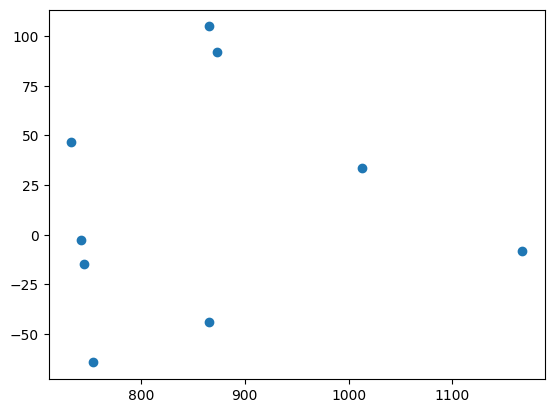

In [73]:
plt.scatter(y_pred,residuals)

In [75]:

# Transform the input features using the scaler
scaled_input = scaler.transform([[2.8,5.5]])

predicted_index_price = regression.predict(scaled_input)

# Print the predicted index price
print(predicted_index_price)

[1480.44025606]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
